In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd
import xarray as xr
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from scipy.stats import entropy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cf
shp_pan = gpd.read_file(r'Data\shapefiles\panamz.geojson')


In [28]:
#stations geodataframe
gdf = gpd.read_file(r'Data\all_stations.geojson')
# rainfall cleaned data
df_bet= pd.read_pickle('Data\ALL_01_20_10bet.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_bet.Code.unique())].to_crs(shp_pan.crs)
gdf_pan = gpd.sjoin(gdf_filtered, shp_pan, how='inner', op='intersects')

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


## test climatologies

In [11]:
df_0120_10 = pd.read_pickle('Data\ALL_01_20_10bet.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_0120_10.Code.unique())].to_crs(shp_pan.crs)
gdf_pan0120_10 = gpd.sjoin(gdf_filtered, shp_pan, how='inner', op='intersects')

df_0120_20 = pd.read_pickle('Data\ALL_01_20_20bet.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_0120_20.Code.unique())].to_crs(shp_pan.crs)
gdf_pan0120_20 = gpd.sjoin(gdf_filtered, shp_pan, how='inner', op='intersects')

df_8110_20 = pd.read_pickle('Data\ALL_81_10_20bet.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_8110_20.Code.unique())].to_crs(shp_pan.crs)
gdf_pan8110_20 = gpd.sjoin(gdf_filtered, shp_pan, how='inner', op='intersects')


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


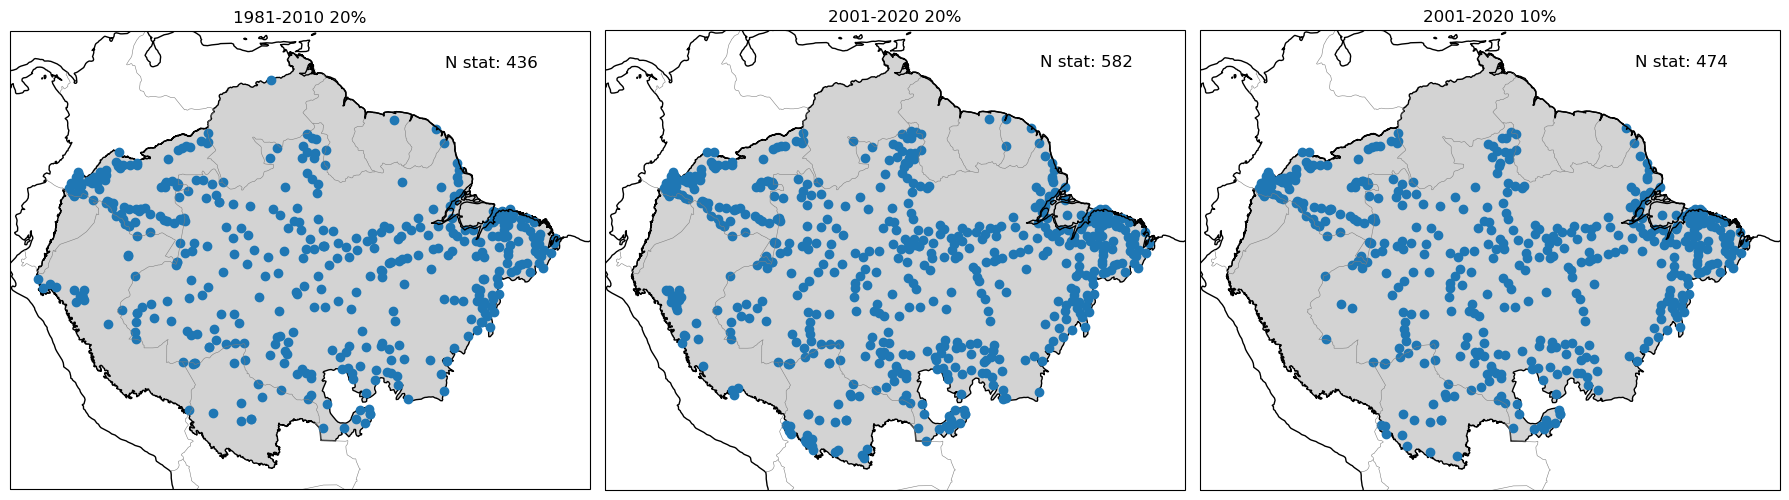

In [12]:
#plot each gdf in a subplot
gdfs = [gdf_pan8110_20, gdf_pan0120_20, gdf_pan0120_10]
titles = ['1981-2010 20%', '2001-2020 20%', '2001-2020 10%']
fig, ax = plt.subplots(1,3, figsize=(18,5), subplot_kw={'projection': ccrs.PlateCarree()})
for i, gdf in enumerate(gdfs):
    shp_pan.plot(ax=ax[i], color='lightgrey', edgecolor='black')
    gdf.plot(ax=ax[i])
    ax[i].coastlines()
    ax[i].set_title(titles[i])
    # plot also the number of stations
    ax[i].annotate('N stat: {}'.format(len(gdf)), xy=(0.75, 0.92), xycoords='axes fraction', fontsize=12)
    ax[i].add_feature(cf.BORDERS, edgecolor='grey', linewidth=0.4)

plt.tight_layout()

In [13]:
gdf_clim = gdf_pan8110_20.sort_values(by='Code').reset_index(drop=True)
df_8110_20= df_8110_20.sort_values(by='Code').reset_index(drop=True)

In [14]:
#take mean of each station in df_8110_20 for the periods 1981-2010 and 1991-2020, 2000-2020 and 1981-2020
periods = [['1981', '2010'],  ['1981', '2000'], ['1991', '2010']]
for period in periods:
    df = df_8110_20[(df_8110_20.Date.dt.year >= int(period[0])) & (df_8110_20.Date.dt.year <= int(period[1]))]
    dff = df.groupby('Code').mean().reset_index()
    gdf_clim['Total_' + period[0]+'_'+period[1]] = dff['Total']*12
    #do the dsl
    df_dry = df[df['Total']<100]
    gdf_clim['DSL_'+ period[0]+'_'+period[1]] =  df_dry.groupby(['Code', df_dry.Date.dt.year]).size().groupby('Code').mean().reset_index()[0]

C:\Users\luisg\AppData\Local\Temp\ipykernel_21068\1608472846.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dff = df.groupby('Code').mean().reset_index()
C:\Users\luisg\AppData\Local\Temp\ipykernel_21068\1608472846.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dff = df.groupby('Code').mean().reset_index()
C:\Users\luisg\AppData\Local\Temp\ipykernel_21068\1608472846.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fu

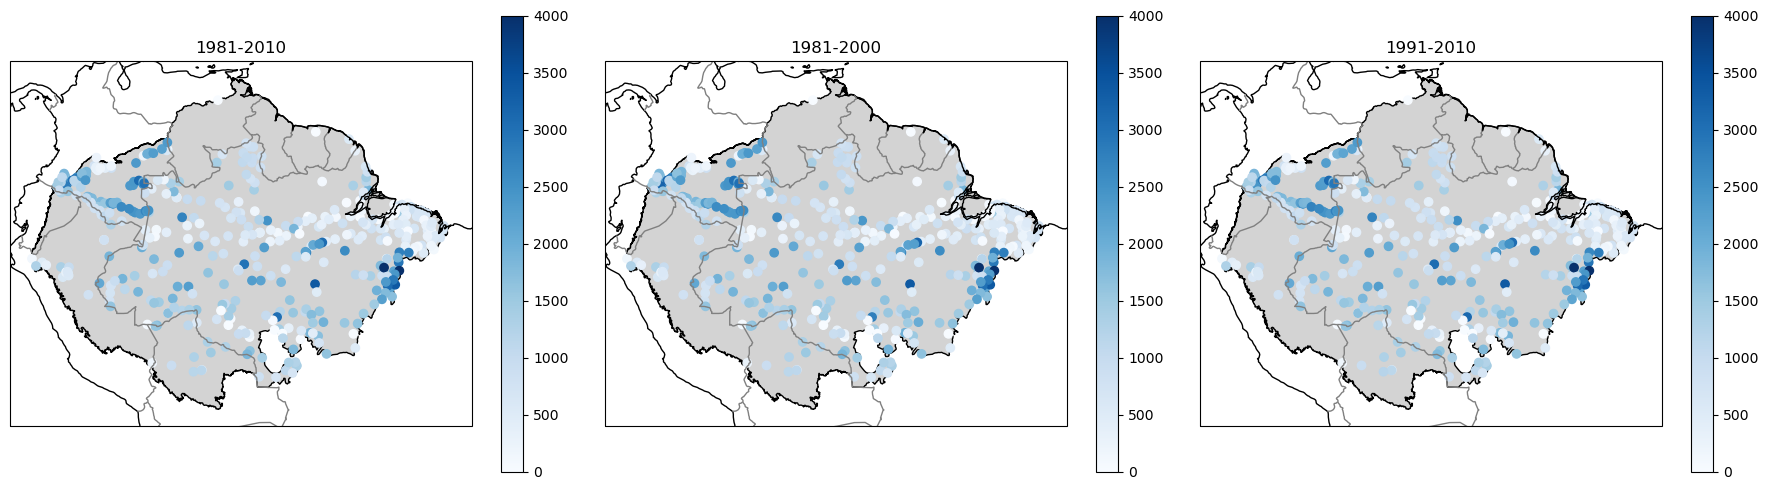

In [24]:
#plot each total column in a subplot
fig, ax = plt.subplots(1,3, figsize=(18,5), subplot_kw={'projection': ccrs.PlateCarree()})
for i, period in enumerate(periods):
    shp_pan.plot(ax=ax[i], color='lightgrey', edgecolor='black')
    gdf_clim.plot(ax=ax[i], column='Total_'+period[0]+'_'+period[1], legend=True, cmap='Blues', vmin=0, vmax=4000)
    ax[i].coastlines()
    ax[i].set_title(period[0]+'-'+period[1])
    # plot also the number of stations
    ax[i].add_feature(cf.BORDERS, edgecolor='grey')

plt.tight_layout()

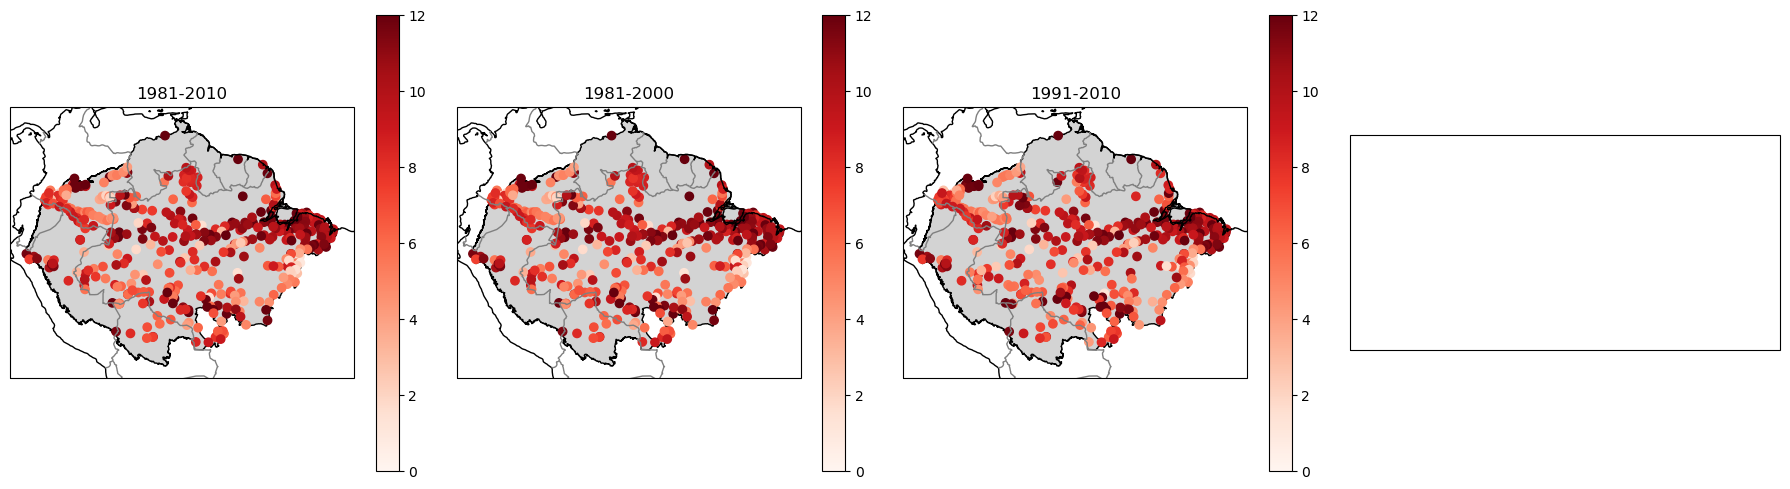

In [16]:
#plot each total column in a subplot
fig, ax = plt.subplots(1,4, figsize=(18,5), subplot_kw={'projection': ccrs.PlateCarree()})
for i, period in enumerate(periods):
    shp_pan.plot(ax=ax[i], color='lightgrey', edgecolor='black')
    gdf_clim.plot(ax=ax[i], column='DSL_'+period[0]+'_'+period[1], legend=True, cmap='Reds', vmin=0, vmax=12)
    ax[i].coastlines()
    ax[i].set_title(period[0]+'-'+period[1])
    # plot also the number of stations
    ax[i].add_feature(cf.BORDERS, edgecolor='grey')

plt.tight_layout()

In [17]:
#each gdf_climm minus the mean of the period 1981-2010
gdf_anom = gdf_clim.copy()
for period in periods:
    gdf_anom['Total_'+period[0]+'_'+period[1]] =  gdf_clim['Total_1981_2010'] -gdf_clim['Total_'+period[0]+'_'+period[1]] 
    gdf_anom['DSL_'+period[0]+'_'+period[1]] = gdf_clim['DSL_1981_2010'] -gdf_clim['DSL_'+period[0]+'_'+period[1]]  

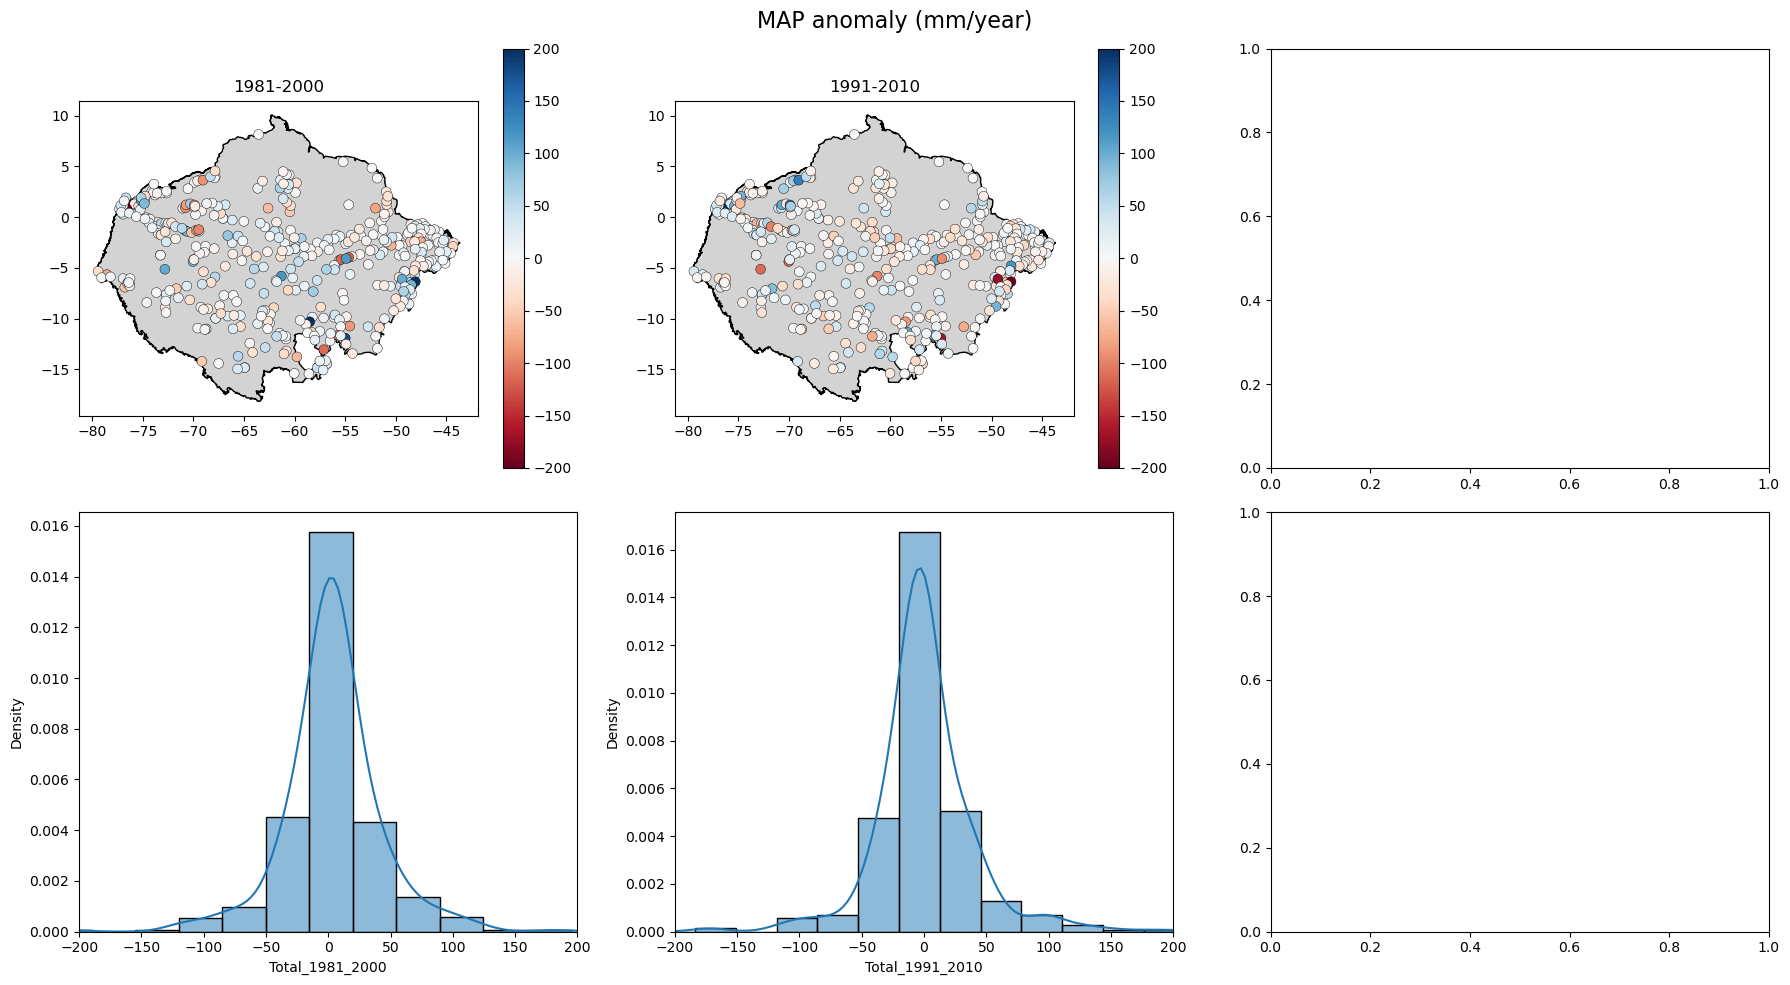

In [18]:
#now plot each period minus the 1981-2010
fig, ax = plt.subplots(2,3, figsize=(18,10))
for i, period in enumerate(periods[1:]):
    shp_pan.plot(ax=ax[0][i], color='lightgrey', edgecolor='black')
    gdf_anom.plot(ax=ax[0][i], column='Total_'+period[0]+'_'+period[1], legend=True, cmap='RdBu', vmin=-200, vmax=200, edgecolor='black', linewidth=0.3, s=50)
    ax[0][i].set_title(period[0]+'-'+period[1])
    # plot histogram
    sns.histplot(gdf_anom['Total_'+period[0]+'_'+period[1]], ax=ax[1][i], kde=True, stat='density', bins=20)
    #set x axis equal
    ax[1][i].set_xlim(-200,200)
fig.suptitle('MAP anomaly (mm/year)', fontsize=16)
plt.tight_layout()

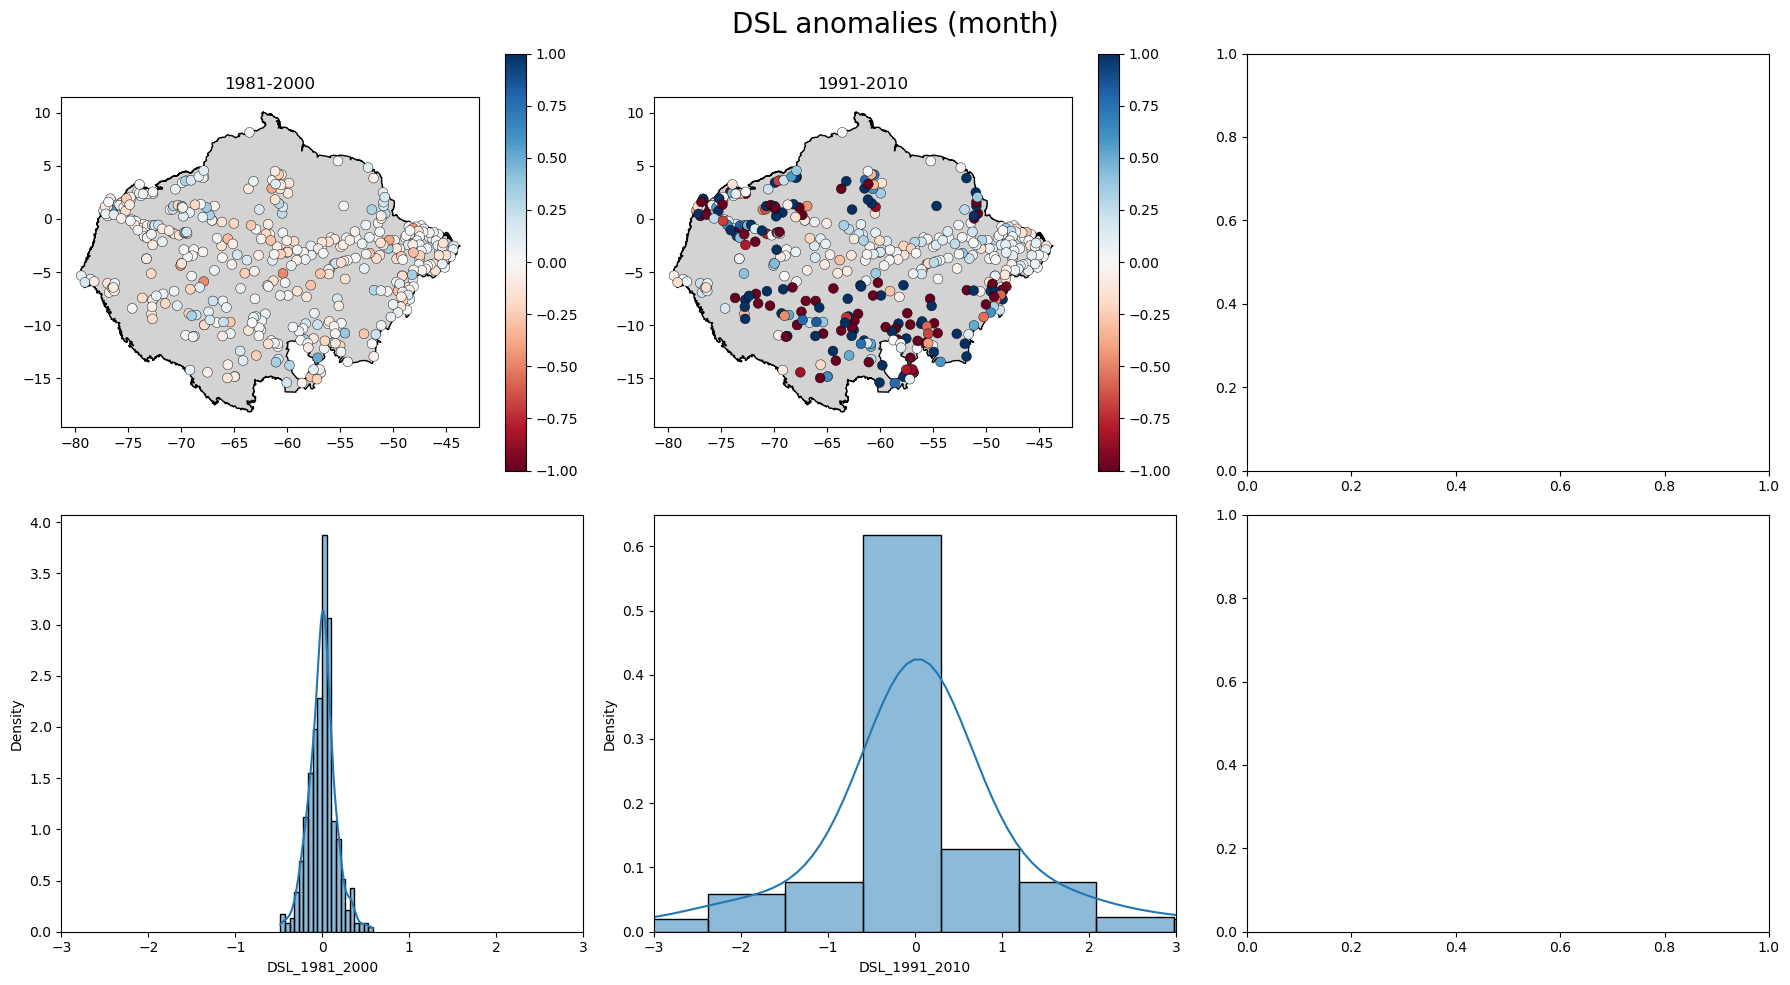

In [25]:
#now plot each period minus the 1981-2010
fig, ax = plt.subplots(2,3, figsize=(18,10))
for i, period in enumerate(periods[1:]):
    shp_pan.plot(ax=ax[0][i], color='lightgrey', edgecolor='black')
    gdf_anom.plot(ax=ax[0][i], column='DSL_'+period[0]+'_'+period[1], legend=True, cmap='RdBu', vmin=-1, vmax=1, edgecolor='black', linewidth=0.3, s=50)
    ax[0][i].set_title(period[0]+'-'+period[1])
    # plot histogram
    sns.histplot(gdf_anom['DSL_'+period[0]+'_'+period[1]], ax=ax[1][i], kde=True, stat='density', bins=20)
    #set x axis equal
    ax[1][i].set_xlim(-3,3)
fig.suptitle('DSL anomalies (month)', fontsize=20)
plt.tight_layout()

In [20]:
#each gdf_climm minus the mean of the period 1981-2010
gdf_ratio = gdf_clim.copy()
for period in periods:
    gdf_ratio['Total_'+period[0]+'_'+period[1]] = (gdf_clim['Total_1981_2010'] - gdf_clim['Total_'+period[0]+'_'+period[1]]) /  gdf_clim['Total_1981_2010'] * 100
    gdf_ratio['DSL_'+period[0]+'_'+period[1]] =   (gdf_clim['DSL_1981_2010'] - gdf_clim['DSL_'+period[0]+'_'+period[1]] ) / gdf_clim['DSL_1981_2010'] * 100

In [21]:
#do the pearson R
from scipy.stats import pearsonr
for period in periods:
    rr_total = pearsonr(gdf_clim['Total_'+period[0]+'_'+period[1]], gdf_clim['Total_1981_2010'])
    rr_dsl = pearsonr(gdf_clim['DSL_'+period[0]+'_'+period[1]], gdf_clim['DSL_1981_2010'])
    print('Total {}-{}: {}'.format(period[0], period[1], rr_total[0]))
    print('DSL {}-{}: {}'.format(period[0], period[1], rr_dsl[0]))

Total 1981-2010: 0.9999999999999999
DSL 1981-2010: 0.9999999999999999
Total 1981-2000: 0.9984607603334568
DSL 1981-2000: 0.99874775100891
Total 1991-2010: 0.9986913654741428
DSL 1991-2010: 0.7867976194897415


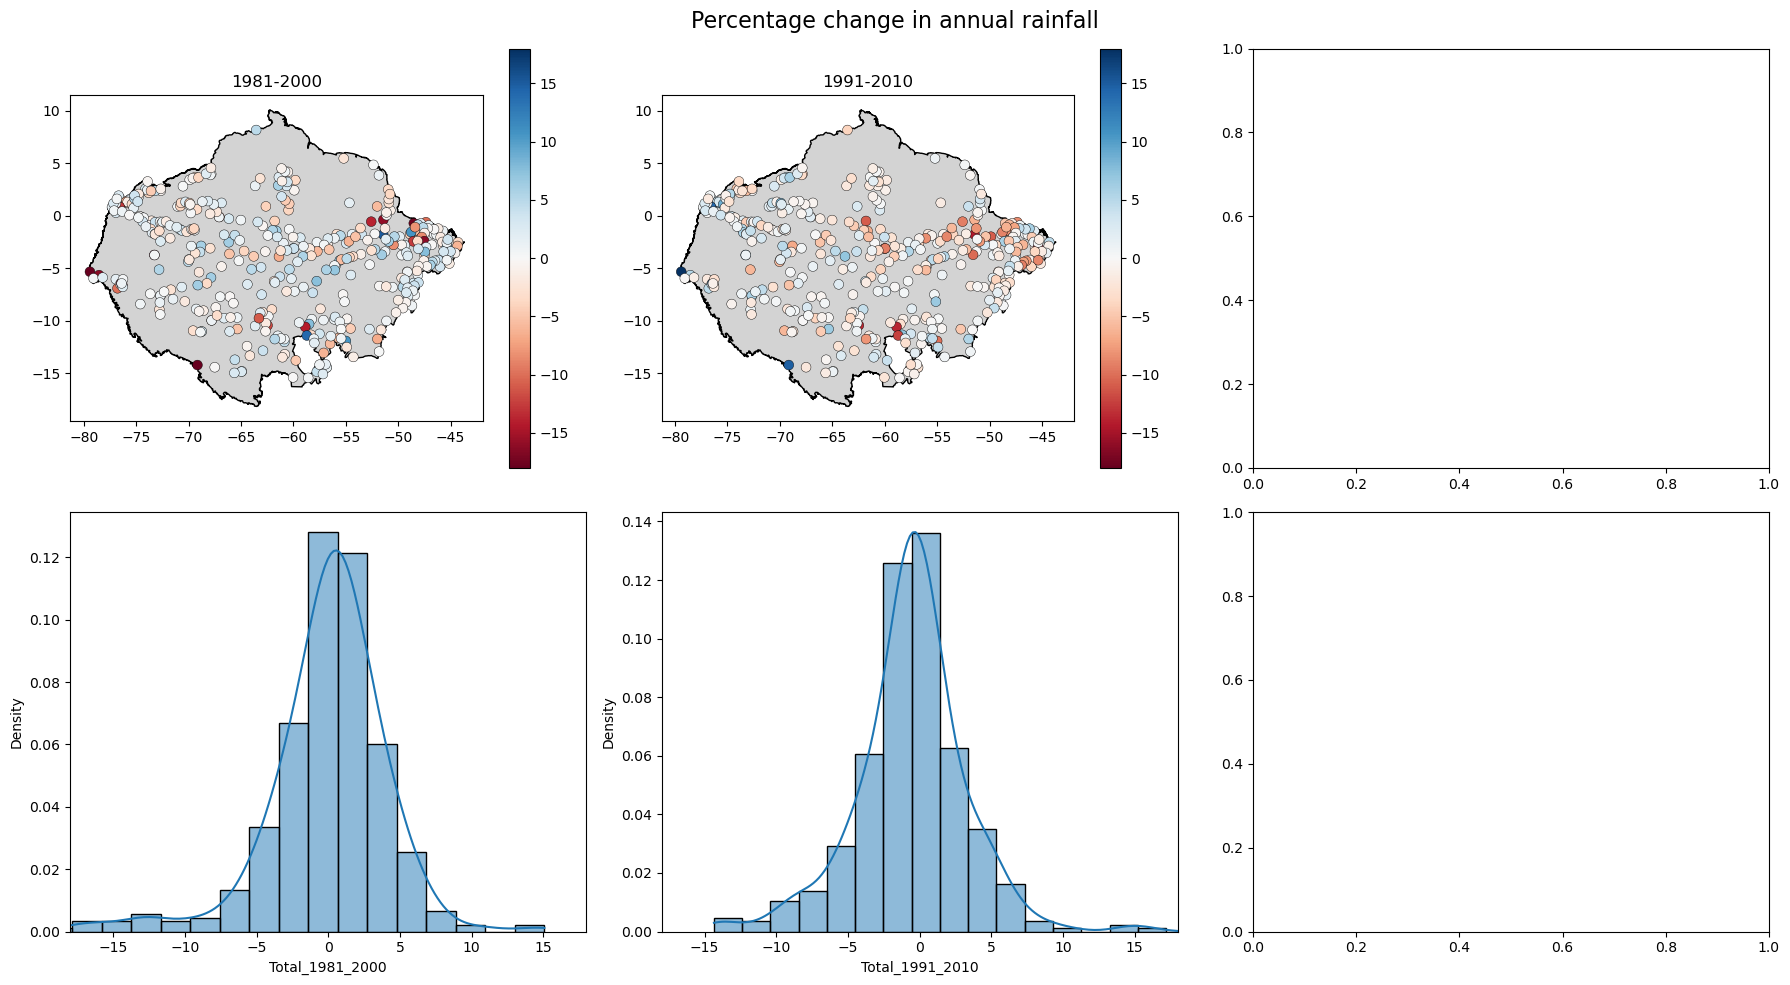

In [22]:
#now plot each period minus the 1981-2010
fig, ax = plt.subplots(2,3, figsize=(18,10))
for i, period in enumerate(periods[1:]):
    shp_pan.plot(ax=ax[0][i], color='lightgrey', edgecolor='black')
    gdf_ratio.plot(ax=ax[0][i], column='Total_'+period[0]+'_'+period[1], legend=True, cmap='RdBu', vmin=-18, vmax=18, edgecolor='black', linewidth=0.3, s=50)
    ax[0][i].set_title(period[0]+'-'+period[1])
    # plot histogram
    sns.histplot(gdf_ratio['Total_'+period[0]+'_'+period[1]], ax=ax[1][i], kde=True, stat='density', bins=20)
    #set x axis equal
    ax[1][i].set_xlim(-18,18)
fig.suptitle('Percentage change in annual rainfall', fontsize=16)
plt.tight_layout()

## test plot months

In [50]:
#stations geodataframe
gdf = gpd.read_file(r'Data\all_stations.geojson')
# rainfall cleaned data
df_bet= pd.read_pickle('Data\ALL_01_20_20bet.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_bet.Code.unique())].to_crs(shp_pan.crs)
gdf_pan = gpd.sjoin(gdf_filtered, shp_pan, how='inner', op='intersects')

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [51]:
# get points from gdf_filtered that are inside shp
gdf_amz = gdf_pan
df_amz =  df_bet[df_bet.Code.isin(gdf_amz.Code.unique())]
#df_amz to pkl
#df_amz.to_pickle(r'Data\amazon\df_amz_bet.pkl')

In [52]:
df_clima = df_amz.groupby(['Code', df_amz.Date.dt.month]).mean()
df_clima = df_clima.unstack()
df_clima.columns = df_clima.columns.droplevel(0)
df_clima.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_clima = df_clima.join(gdf_amz.set_index('Code')['geometry'])
df_clima = gpd.GeoDataFrame(df_clima)

C:\Users\luisg\AppData\Local\Temp\ipykernel_21068\152352569.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clima = df_amz.groupby(['Code', df_amz.Date.dt.month]).mean()


In [53]:
vmax = 400
vmin = 0
#df_clima[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].max().max()
#df_clima[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].min().min()
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []

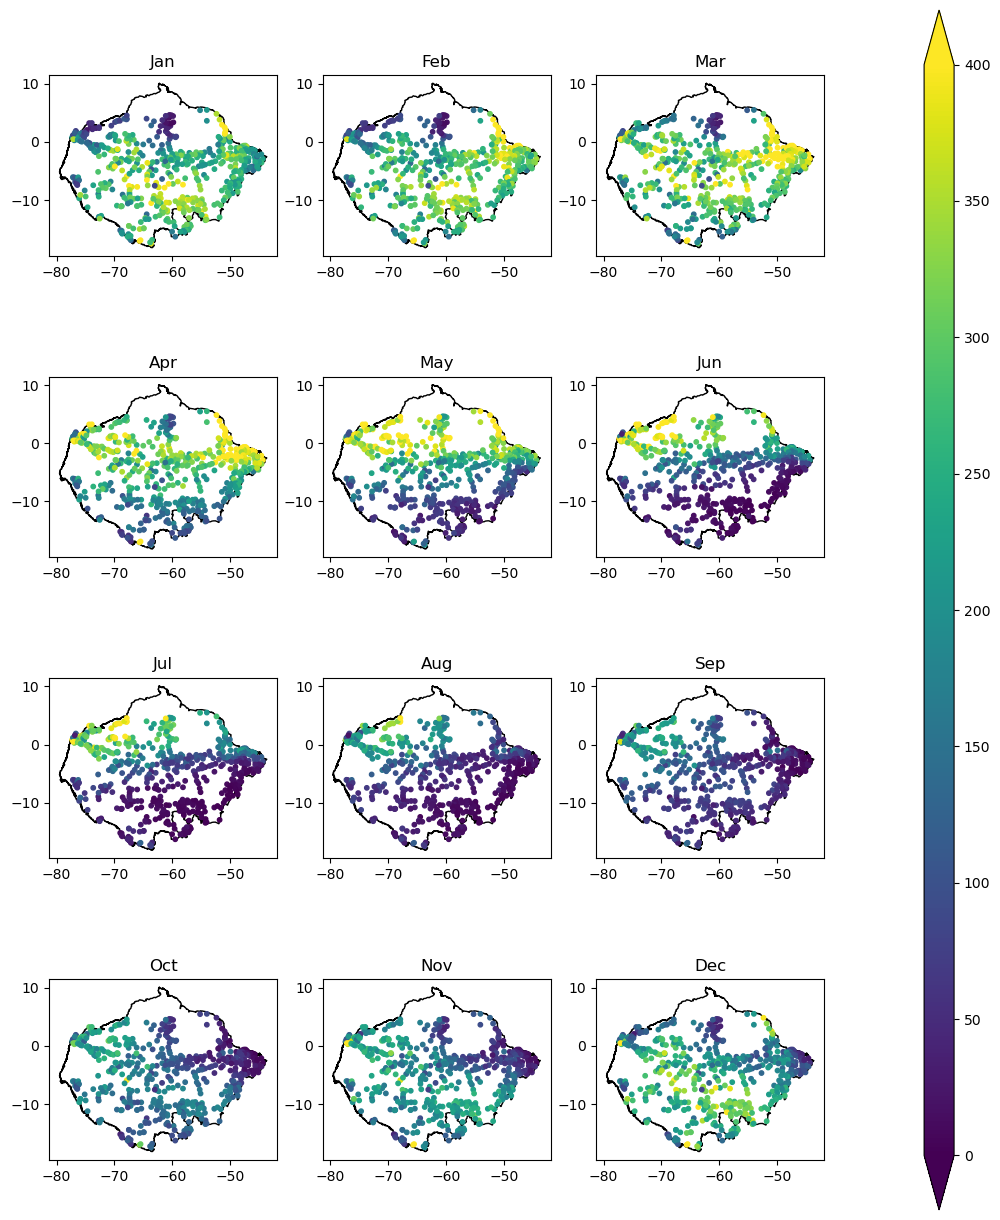

In [54]:
#plot for each month of df_clima
fig, axes = plt.subplots(4, 3, figsize=(10,15))
axes = axes.flatten()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
fig.colorbar(sm, cax=cax, extend='both')

for i, ax in enumerate(axes):
    shp_pan.plot(ax = ax, color='white', edgecolor='black')
    df_clima.plot(column=df_clima.columns[i], ax=ax, vmin=vmin, vmax=vmax, markersize=10)
    ax.set_title(df_clima.columns[i])


# clim

In [197]:
#stations geodataframe
gdf = gpd.read_file(r'Data\all_stations.geojson')
# rainfall cleaned data
df_bet= pd.read_pickle('Data\ALL_01_20_20bet.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_bet.Code.unique())].to_crs(shp_pan.crs)
gdf_pan = gpd.sjoin(gdf_filtered, shp_pan, how='inner', op='intersects')

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [198]:
# get points from gdf_filtered that are inside shp
gdf_amz = gdf_pan
df_amz =  df_bet[df_bet.Code.isin(gdf_amz.Code.unique())]

In [199]:
# calculate MAP climatology for each station and add to gdf_amz
df_clima = df_amz.groupby(['Code']).mean().reset_index()
df_clima['Total'] = df_clima['Total']*12
gdf_amz = gdf_amz.merge(df_clima[['Code', 'Total']], on='Code')


C:\Users\luisg\AppData\Local\Temp\ipykernel_21068\1029290600.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clima = df_amz.groupby(['Code']).mean().reset_index()


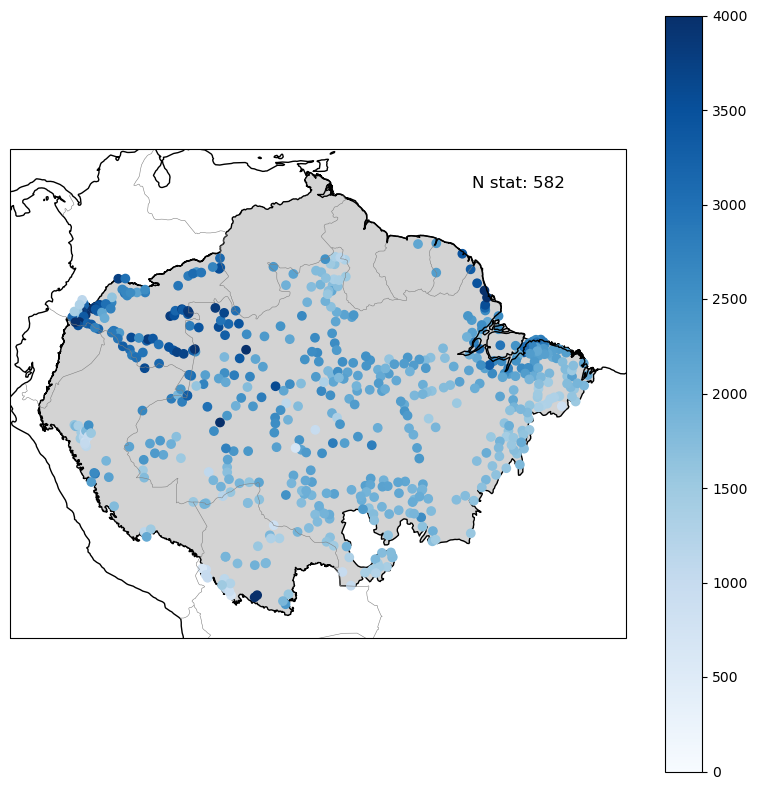

In [200]:
#plot each gdf in a subplot

fig, ax = plt.subplots(1,1, figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})
shp_pan.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_amz.plot(ax=ax, column='Total', legend=True, cmap='Blues', vmin=0, vmax=4000)
ax.coastlines()

# plot also the number of stations
ax.annotate('N stat: {}'.format(len(gdf_amz)), xy=(0.75, 0.92), xycoords='axes fraction', fontsize=12)
ax.add_feature(cf.BORDERS, edgecolor='grey', linewidth=0.4)

plt.tight_layout()

# bootstrap

In [177]:
def gdf_clim(df, gdf=gdf_pan):
    gdf_filtered = gdf[gdf.Code.isin(df.Code.unique())].to_crs(shp_pan.crs)
    # get points from gdf_filtered that are inside shp
    # calculate MAP climatology for each station and add to gdf_pan
    df_clima = df.groupby(['Code']).mean().reset_index()
    df_clima['Total'] = df_clima['Total']*12
    gdf_clim = gdf_filtered.merge(df_clima[['Code', 'Total']], on='Code')
    return gdf_clim

def dsl_clim(df, gdf=gdf_pan):
    gdf_filtered = gdf[gdf.Code.isin(df.Code.unique())].to_crs(shp_pan.crs)
    df_dry = df[df['Total']<100]
    df_clima = df_dry.groupby(['Code', df_dry.Date.dt.year]).size().groupby('Code').mean().reset_index().rename(columns={0:'DSL'})
    gdf_clim = gdf_filtered.merge(df_clima[['Code', 'DSL']], on='Code')
    return gdf_clim

def grid_stats(gdf_pan, res, lon_min = -81, lon_max = -42, lat_min = -20, lat_max = 11, var='Total'):
    # Step 1: Convert GeoDataFrame to DataFrame with point coordinates and Total values
    data = gdf_pan[['geometry', var]].copy()
    data['lon'] = data['geometry'].apply(lambda p: p.x)
    data['lat'] = data['geometry'].apply(lambda p: p.y)
    data = data.drop(columns=['geometry'])

    # Step 2: Create a grid with resxres° resolution and assign each point to a grid cell


    lon_grid = np.arange(lon_min, lon_max + res, res)
    lat_grid = np.arange(lat_min, lat_max + res, res)

    data['lon_bin'] = np.digitize(data['lon'], lon_grid)
    data['lat_bin'] = np.digitize(data['lat'], lat_grid)

    # Step 3: Compute the mean Total value for each grid cell
    grid_cells = data.groupby(['lat_bin', 'lon_bin'])[var].mean().reset_index()

    # Step 4: Create an empty grid with NaN values
    empty_grid = np.full((len(lat_grid), len(lon_grid)), np.nan)

    # Step 5: Fill the grid with the computed mean Total values
    for _, row in grid_cells.iterrows():
        lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
        #idx as int
        lat_idx, lon_idx = int(lat_idx), int(lon_idx)
        empty_grid[lat_idx - 1, lon_idx - 1] = row[var]

    # Step 6: Create an xarray DataArray from the result
    data_array = xr.DataArray(empty_grid,
                              dims=('latitude', 'longitude'),
                              coords={'latitude': lat_grid, 'longitude': lon_grid})
    
    return data_array



In [180]:
#stations geodataframe
gdf = gpd.read_file(r'Data\all_stations.geojson')
gdf_pan = gpd.sjoin(gdf.to_crs(shp_pan.crs), shp_pan, how='inner', op='intersects')
# rainfall cleaned data
df_0120_10= pd.read_pickle('Data\ALL_01_20_10bet.pkl')
df_0120_20 = pd.read_pickle('Data\ALL_01_20_20bet.pkl')
gdf_0120_10_clim = gdf_clim(df_0120_10)
gdf_0120_20_clim = gdf_clim(df_0120_20)
gdf_0120_10_dsl = dsl_clim(df_0120_10)
gdf_0120_20_dsl = dsl_clim(df_0120_20)

c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\luisg\AppData\Local\Temp\ipykernel_21068\2273457727.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clima = df.groupby(['Code']).mean().reset_index()
C:\Users\luisg\AppData\Local\Temp\ipykernel_21068\2273457727.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clima = df.groupby(['Code']).mean().reset_index()


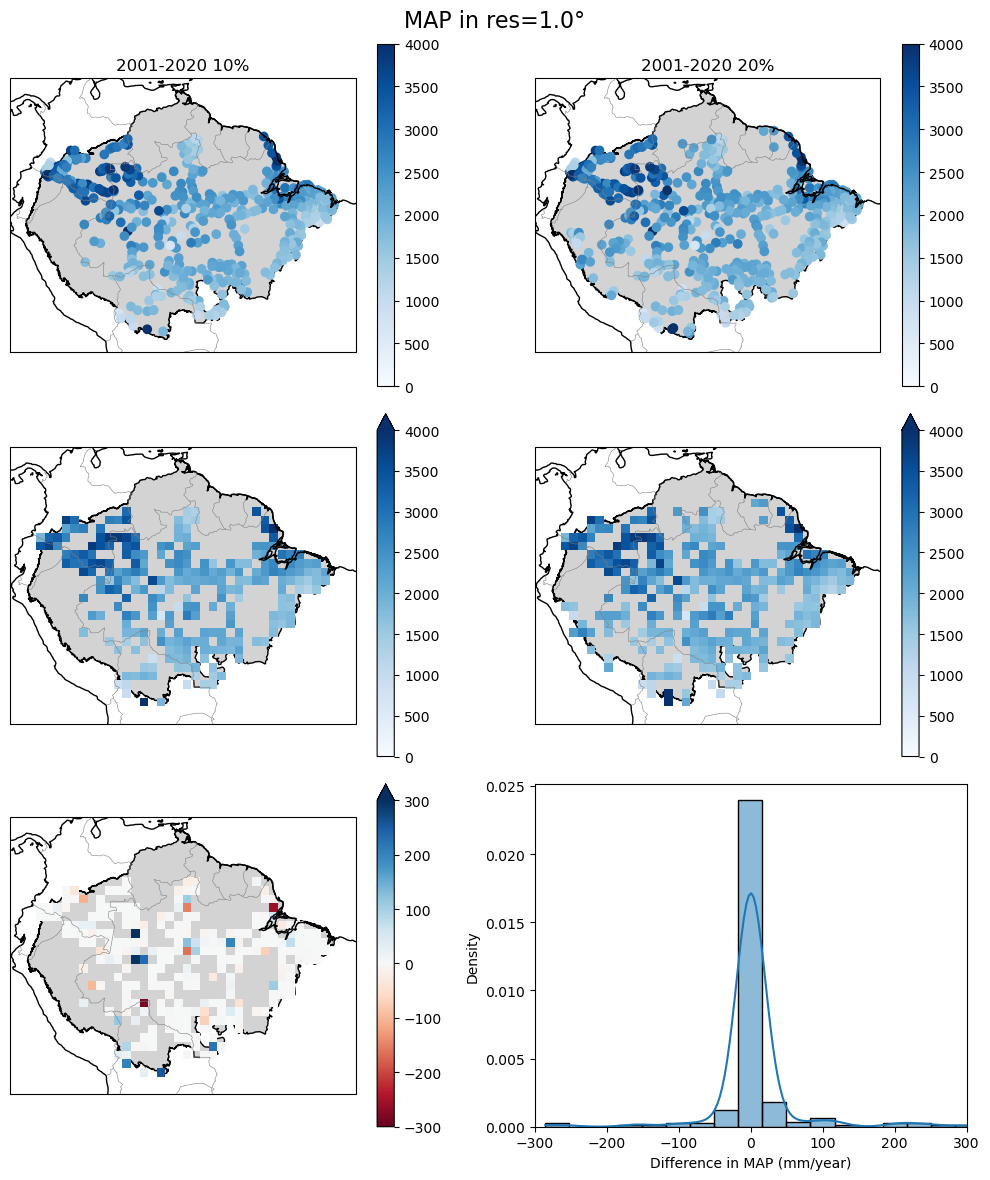

In [184]:
res = 1.0
ds_0120_10 = grid_stats(gdf_0120_10_clim, res)
ds_0120_20 = grid_stats(gdf_0120_20_clim, res)

# plot the 2 arrays, then the difference between them only where both have values
fig, ax = plt.subplots(3,2, figsize=(10,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
for aa in ax:
    aa.coastlines()
    aa.add_feature(cf.BORDERS, edgecolor='grey', linewidth=0.4)
    shp_pan.plot(ax=aa, color='lightgrey', edgecolor='black')
#plot gdf clim in first row
gdf_0120_10_clim.plot(ax=ax[0], column='Total', legend=True, cmap='Blues', vmin=0, vmax=4000)
gdf_0120_20_clim.plot(ax=ax[1], column='Total', legend=True, cmap='Blues', vmin=0, vmax=4000)

ds_0120_10.plot(ax=ax[2], cmap='Blues', vmin=0, vmax=4000)
ds_0120_20.plot(ax=ax[3], cmap='Blues', vmin=0, vmax=4000)
(ds_0120_20 - ds_0120_10).where(ds_0120_10 != np.nan).plot(ax=ax[4], cmap='RdBu', vmin=-300, vmax=300)
#delete last axis
fig.delaxes(ax[5])
#create again and plot the histogram of difference
ax[5] = fig.add_subplot(3,2,6)
sns.histplot((ds_0120_20 - ds_0120_10).values.flatten(), ax=ax[5], kde=True, stat='density', bins=20)
ax[5].set_xlim(-300,300)
ax[5].set_xlabel('Difference in MAP (mm/year)')
ax[0].set_title('2001-2020 10%')
ax[1].set_title('2001-2020 20%')
fig.suptitle(f'MAP in res={res}°', fontsize=16)

plt.tight_layout()

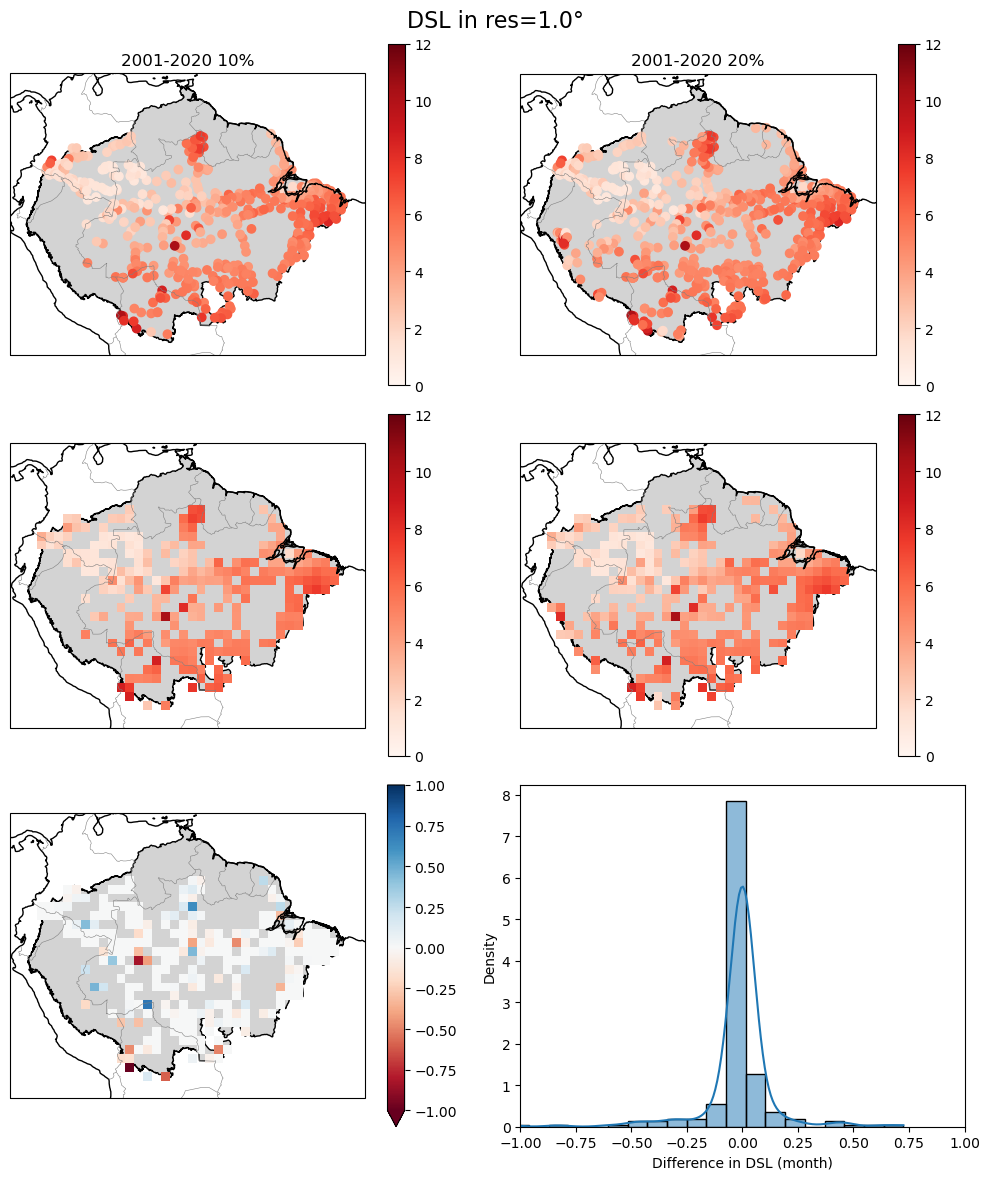

In [183]:
res = 1.0
ds_0120_10 = grid_stats(gdf_0120_10_dsl, res, var='DSL')
ds_0120_20 = grid_stats(gdf_0120_20_dsl, res, var='DSL')

# plot the 2 arrays, then the difference between them only where both have values
fig, ax = plt.subplots(3,2, figsize=(10,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()
for aa in ax:
    aa.coastlines()
    aa.add_feature(cf.BORDERS, edgecolor='grey', linewidth=0.4)
    shp_pan.plot(ax=aa, color='lightgrey', edgecolor='black')
#plot gdf clim in first row
gdf_0120_10_dsl.plot(ax=ax[0], column='DSL', legend=True, cmap='Reds', vmin=0, vmax=12)
gdf_0120_20_dsl.plot(ax=ax[1], column='DSL', legend=True, cmap='Reds', vmin=0, vmax=12)

ds_0120_10.plot(ax=ax[2], cmap='Reds', vmin=0, vmax=12)
ds_0120_20.plot(ax=ax[3], cmap='Reds', vmin=0, vmax=12)
(ds_0120_20 - ds_0120_10).where(ds_0120_10 != np.nan).plot(ax=ax[4], cmap='RdBu', vmin=-1, vmax=1)
#delete last axis
fig.delaxes(ax[5])
#create again and plot the histogram of difference
ax[5] = fig.add_subplot(3,2,6)
sns.histplot((ds_0120_20 - ds_0120_10).values.flatten(), ax=ax[5], kde=True, stat='density', bins=20)
ax[5].set_xlim(-1,1)
ax[5].set_xlabel('Difference in DSL (month)')
ax[0].set_title('2001-2020 10%')
ax[1].set_title('2001-2020 20%')
fig.suptitle(f'DSL in res={res}°', fontsize=16)

plt.tight_layout()

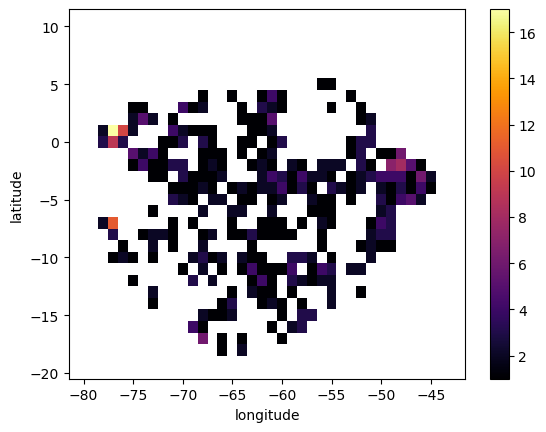

In [240]:
res = 1
lon_min = -81
lon_max = -42
lat_min = -20 
lat_max = 11
var = 'N'
gdf_pan = gdf_0120_20_clim.copy()
# Step 1: Convert GeoDataFrame to DataFrame with point coordinates and Total values
data = gdf_pan[['geometry']].copy()
data['lon'] = data['geometry'].apply(lambda p: p.x)
data['lat'] = data['geometry'].apply(lambda p: p.y)
data = data.drop(columns=['geometry'])
# Step 2: Create a grid with resxres° resolution and assign each point to a grid cell
lon_grid = np.arange(lon_min, lon_max + res, res)
lat_grid = np.arange(lat_min, lat_max + res, res)
data['lon_bin'] = np.digitize(data['lon'], lon_grid)
data['lat_bin'] = np.digitize(data['lat'], lat_grid)
# Step 3: Compute the mean Total value for each grid cell
grid_cells = data.groupby(['lat_bin', 'lon_bin']).size().reset_index().rename(columns={0:var})
# Step 4: Create an empty grid with NaN values
empty_grid = np.full((len(lat_grid), len(lon_grid)), np.nan)
# Step 5: Fill the grid with the computed mean Total values
for _, row in grid_cells.iterrows():
    lat_idx, lon_idx = row['lat_bin'], row['lon_bin']
    #idx as int
    lat_idx, lon_idx = int(lat_idx), int(lon_idx)
    empty_grid[lat_idx - 1, lon_idx - 1] = row[var]
# Step 6: Create an xarray DataArray from the result
data_array = xr.DataArray(empty_grid,
                          dims=('latitude', 'longitude'),
                          coords={'latitude': lat_grid, 'longitude': lon_grid})

data_array.plot(cmap='inferno')